## Part 1: Data Processing and Feature Engineering

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Loading the Datasets

In [2]:

train = pd.read_csv("/content/sample_data/sales_forecasting/train.csv")
test = pd.read_csv("/content/sample_data/sales_forecasting/test.csv")
stores = pd.read_csv("/content/sample_data/sales_forecasting/stores.csv")
oil = pd.read_csv("/content/sample_data/sales_forecasting/oil.csv")
holidays = pd.read_csv("/content/sample_data/sales_forecasting/holidays_events.csv")
transactions=pd.read_csv("/content/sample_data/sales_forecasting/transactions.csv")
sample_submission=pd.read_csv("/content/sample_data/sales_forecasting/sample_submission.csv")

In [3]:
datasets=[train,test,stores,oil,holidays,transactions,sample_submission]
dataset_names=['train','test','stores','oil','holidays','transactions','sample_submission']
for i,j in zip(datasets,dataset_names):
    print(f"Dataset:{j}")
    print(i.head(5))
    print('\n'+'*'*100+'\n')

Dataset:train
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

****************************************************************************************************

Dataset:test
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

****************************************************************************************************

Dataset:stores
   store_nbr           city     

### 1.2 Handling Missing values


In [4]:

print('\n','*'*30,'train_dataset','*'*30,'\n'*3,train.info())
print('\n','*'*30,'test_dataset','*'*30,'\n'*3,test.info())
print('\n','*'*30,'stores_dataset','*'*30,'\n'*3,stores.info())
print('\n','*'*30,'oil_dataset','*'*30,'\n'*3,oil.info())
print('\n','*'*30,'holidays_dataset','*'*30,'\n'*3,holidays.info())
print('\n','*'*30,'transactions_dataset','*'*30,'\n'*3,transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB

 ****************************** train_dataset ****************************** 


 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB

 ****************************** test_dataset ****************************** 


 Non

                        In oil dataset dcoilwtico feature have 43 missing values.

In [5]:
oil['dcoilwtico']=oil['dcoilwtico'].interpolate()  # using linear interpolation to fill the missing values in oil dataset.

In [6]:
oil.isnull().sum()

,0
date,0
dcoilwtico,1


In [7]:
oil["dcoilwtico"].fillna(method='bfill', inplace=True)          #using bfill to fill the first row null value

<ipython-input-7-a830f0cc0323>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oil["dcoilwtico"].fillna(method='bfill', inplace=True)          #using bfill to fill the first row null value
<ipython-input-7-a830f0cc0323>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil["dcoilwtico"].fillna(method='bfill', inplace=True)          #using bfill to fill the first row null value


In [8]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


### 1.3 Converting Date Columns to Datetime Format


In [9]:
for df in [train, test, oil, holidays, transactions]:
    df["date"] = pd.to_datetime(df["date"])

### 1.4 Merging datasets

In [10]:
train = train.merge(stores, on="store_nbr", how="left")
train = train.merge(oil, on="date", how="left")
train = train.merge(holidays, on="date", how="left")
train = train.merge(transactions,on=["date","store_nbr"],how="left")

test = test.merge(stores, on="store_nbr", how="left")
test = test.merge(oil, on="date", how="left")
test = test.merge(holidays, on="date", how="left")
test = test.merge(transactions,on=["date","store_nbr"],how="left")

In [11]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [12]:
print(train.shape,test.shape)

(3054348, 17) (28512, 16)


In [13]:
dataset_names = train.columns
for i in dataset_names:
    missing_percent = (train[i].isnull().sum() / len(train)) * 100
    print(f"Col: {i}, Missing Percentage: {missing_percent:.2f}%")


Col: id, Missing Percentage: 0.00%
Col: date, Missing Percentage: 0.00%
Col: store_nbr, Missing Percentage: 0.00%
Col: family, Missing Percentage: 0.00%
Col: sales, Missing Percentage: 0.00%
Col: onpromotion, Missing Percentage: 0.00%
Col: city, Missing Percentage: 0.00%
Col: state, Missing Percentage: 0.00%
Col: type_x, Missing Percentage: 0.00%
Col: cluster, Missing Percentage: 0.00%
Col: dcoilwtico, Missing Percentage: 28.76%
Col: type_y, Missing Percentage: 83.55%
Col: locale, Missing Percentage: 83.55%
Col: locale_name, Missing Percentage: 83.55%
Col: description, Missing Percentage: 83.55%
Col: transferred, Missing Percentage: 83.55%
Col: transactions, Missing Percentage: 8.16%


In [14]:
dataset_names = test.columns
for i in dataset_names:
    missing_percent = (test[i].isnull().sum() / len(train)) * 100
    print(f"Col: {i}, Missing Percentage: {missing_percent:.2f}%")

Col: id, Missing Percentage: 0.00%
Col: date, Missing Percentage: 0.00%
Col: store_nbr, Missing Percentage: 0.00%
Col: family, Missing Percentage: 0.00%
Col: onpromotion, Missing Percentage: 0.00%
Col: city, Missing Percentage: 0.00%
Col: state, Missing Percentage: 0.00%
Col: type_x, Missing Percentage: 0.00%
Col: cluster, Missing Percentage: 0.00%
Col: dcoilwtico, Missing Percentage: 0.23%
Col: type_y, Missing Percentage: 0.88%
Col: locale, Missing Percentage: 0.88%
Col: locale_name, Missing Percentage: 0.88%
Col: description, Missing Percentage: 0.88%
Col: transferred, Missing Percentage: 0.88%
Col: transactions, Missing Percentage: 0.93%


In [15]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale',
       'locale_name', 'description', 'transferred', 'transactions'],
      dtype='object')

In [16]:
# Dropping those columns which have more than 80% of missing values, but keeping type_y col which is type of holiday for our analysis

train=train.drop(columns=['locale','locale_name','description','transferred','transactions'])
test=test.drop(columns=['locale','locale_name','description','transferred','transactions'])

In [17]:
train["dcoilwtico"].interpolate(method="linear", inplace=True) # perofming interpolation to fill missing values in oil price col.
test["dcoilwtico"].interpolate(method="linear", inplace=True)

<ipython-input-17-d069c58f654f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["dcoilwtico"].interpolate(method="linear", inplace=True) # perofming interpolation to fill missing values in oil price col.
<ipython-input-17-d069c58f654f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [18]:
train['type_y'].isnull().sum()

np.int64(2551824)

In [19]:
train['type_y'].value_counts()

,count
type_y,
Holiday,304722
Event,99792
Additional,67716
Transfer,16038
Work Day,8910
Bridge,5346


In [20]:
train['is_holiday']=train['type_y'].notnull().astype(int)
test['is_holiday']=test['type_y'].notnull().astype(int)

In [21]:
train['is_holiday'].value_counts()

,count
is_holiday,
0,2551824
1,502524


In [22]:
# the missing values represent not a holiday for the those dates in the train dataset so filling them with 'No_Holiday'

train['type_y'].fillna('No Holiday',inplace=True)
test['type_y'].fillna('No Holiday',inplace=True)


<ipython-input-22-c9924b82ae94>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['type_y'].fillna('No Holiday',inplace=True)
<ipython-input-22-c9924b82ae94>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [23]:
test.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
onpromotion,0
city,0
state,0
type_x,0
cluster,0
dcoilwtico,0


In [24]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,1


In [25]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,is_holiday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,No Holiday,0
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,No Holiday,0
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,No Holiday,0
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,No Holiday,0
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,No Holiday,0


## 2. Feature Engineering

### 2.1 Extracting Time Based Features
Time-Based Features: Day, week, month, year, day of the week, and weekend flags are extracted from the date column to capture temporal patterns and seasonality.

In [26]:

# Extracting time-based features from train date col
train["day"] = train["date"].dt.day                     # gives day of month(1-31)
train["week"] = train["date"].dt.isocalendar().week                   # replacement of dt.week to get week no. between(1-53)
train["month"] = train["date"].dt.month
train["year"] = train["date"].dt.year
train["day_of_week"] = train["date"].dt.dayofweek                           # Monday=0, Sunday=6
train["is_weekend"] = train["day_of_week"].isin([5, 6]).astype(int)              # 1 if weekend else 0

# Extracting time-based features from test date col
test["day"] = test["date"].dt.day
test["week"] = test["date"].dt.isocalendar().week
test["month"] = test["date"].dt.month
test["year"] = test["date"].dt.year
test["day_of_week"] = test["date"].dt.dayofweek
test["is_weekend"] = test["day_of_week"].isin([5, 6]).astype(int)


In [27]:
train.head(2)

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,is_holiday,day,week,month,year,day_of_week,is_weekend
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,1,1,1,1,2013,1,0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,1,1,1,1,2013,1,0


In [28]:
test.head(2)

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,is_holiday,day,week,month,year,day_of_week,is_weekend
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,No Holiday,0,16,33,8,2017,2,0
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,No Holiday,0,16,33,8,2017,2,0


In [29]:
print(train.duplicated().sum(),test.duplicated().sum())                            # checking for duplicates

19602 0


In [30]:
train.drop_duplicates(inplace=True)                              # dropping the duplicated rows

In [31]:
train.shape

(3034746, 19)

### 2.2 Identifying seasonal sales Trends

In [32]:
#### Monthly sales of all years

In [33]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'is_holiday',
       'day', 'week', 'month', 'year', 'day_of_week', 'is_weekend'],
      dtype='object')

In [34]:
train['year'].value_counts()

,count
year,
2016,670032
2014,653994
2013,652212
2015,650430
2017,408078


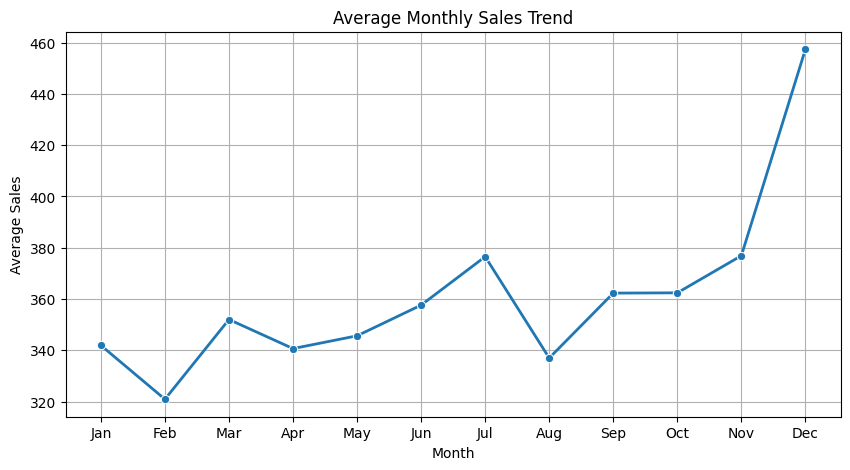

In [35]:
monthly_sales = train.groupby("month")["sales"].mean() # grouping and aggrigating monthly sales.

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, marker="o", linewidth=2)
plt.title("Average Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()

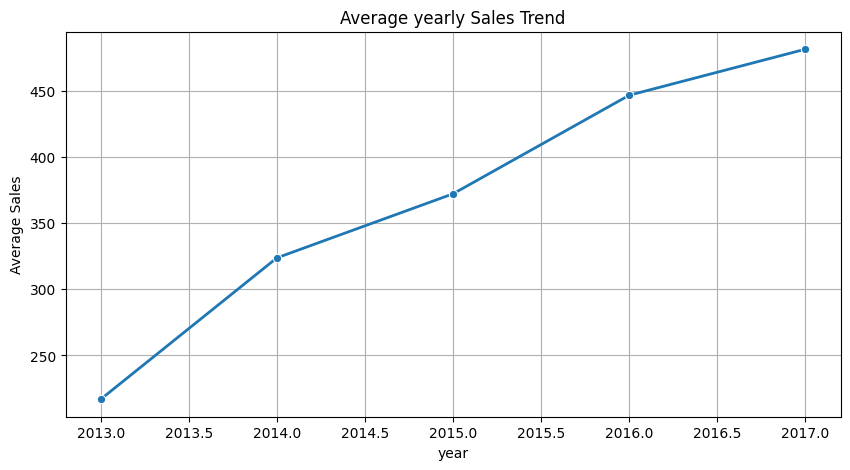

In [36]:
yearly_sales = train.groupby("year")["sales"].mean() # grouping and aggrigating yearly sales.

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_sales.index,y=yearly_sales, marker="o", linewidth=2)
plt.title("Average yearly Sales Trend")
plt.xlabel("year")
plt.ylabel("Average Sales")
plt.grid(True)
plt.show()

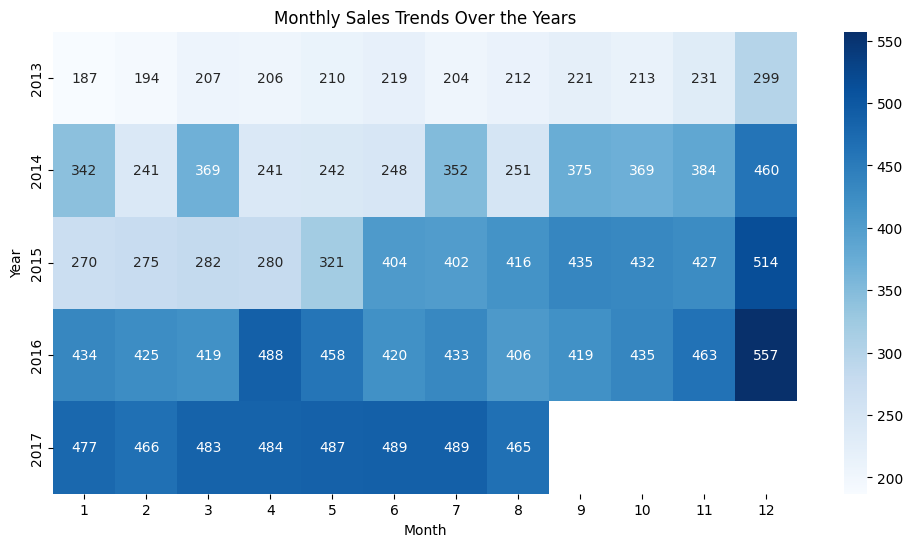

In [37]:
monthly_sales_yearly = train.groupby(["year", "month"])["sales"].mean().unstack()

# Plot yearly trends
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_sales_yearly, cmap="Blues", annot=True, fmt=".0f")
plt.title("Monthly Sales Trends Over the Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

#### Insights that we can draw from the above plots are:
The sales has been increasing year over year with a significant jump from 2014 onward.


The December has the highest sales consistently across all years, and the mid year months(june,july,august) tend to have relatively stable sales, and early months(jan,feb,march) have lower sales.


From this we can conclude that there is a strong seasonality in sales, with December being the peak period. Sales are steadily increasing (upward trend), indicating positive business performance.


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3034746 entries, 0 to 3054347
Data columns (total 19 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   city         object        
 7   state        object        
 8   type_x       object        
 9   cluster      int64         
 10  dcoilwtico   float64       
 11  type_y       object        
 12  is_holiday   int64         
 13  day          int32         
 14  week         UInt32        
 15  month        int32         
 16  year         int32         
 17  day_of_week  int32         
 18  is_weekend   int64         
dtypes: UInt32(1), datetime64[ns](1), float64(2), int32(4), int64(6), object(5)
memory usage: 408.1+ MB


### 2.2 Extracting Event-based features
Event-Based Features: Binary flags are created to indicate promotions, economic events, and government paydays. An additional flag is added to mark the impact of the 2016 Ecuador earthquake.

In [39]:
# Creating Binary Flags for Holidays, Promotions, and Economic Events

train["is_promotion"] = (train["onpromotion"] > 0).astype(int)

train["is_economic_event"] = (train["type_y"] == "Event").astype(int)

In [40]:
test["is_promotion"] = (test["onpromotion"] > 0).astype(int)

test["is_economic_event"] = (test["type_y"] == "Event").astype(int)

In [41]:
train["is_economic_event"].value_counts()

,count
is_economic_event,
0,2934954
1,99792


In [42]:
train["is_promotion"].value_counts()

,count
is_promotion,
0,2412443
1,622303


In [43]:
#  Identifying if a day is a government payday (15th and last day of the month)


def is_payday(date):                                                # function to check if a date is a government payday
    return int(date.day == 15 or date.day == date.days_in_month)


train['is_payday'] = train['date'].apply(is_payday)             # Applying function to create 'is_payday' feature
test['is_payday'] = test['date'].apply(is_payday)

In [44]:
train['is_payday'].value_counts()

,count
is_payday,
0,2836944
1,197802


In [45]:
# Earthquake Impact on (April 16, 2016)

train['earthquake_impact'] = (train['date'] == '2016-04-16').astype(int)
test['earthquake_impact'] = (test['date'] == '2016-04-16').astype(int)

In [46]:
train['earthquake_impact'].value_counts()

,count
earthquake_impact,
0,3032964
1,1782


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3034746 entries, 0 to 3054347
Data columns (total 23 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   date               datetime64[ns]
 2   store_nbr          int64         
 3   family             object        
 4   sales              float64       
 5   onpromotion        int64         
 6   city               object        
 7   state              object        
 8   type_x             object        
 9   cluster            int64         
 10  dcoilwtico         float64       
 11  type_y             object        
 12  is_holiday         int64         
 13  day                int32         
 14  week               UInt32        
 15  month              int32         
 16  year               int32         
 17  day_of_week        int32         
 18  is_weekend         int64         
 19  is_promotion       int64         
 20  is_economic_event  int64     

<ipython-input-48-0dad100a50cb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette="Blues", edgecolor="black")


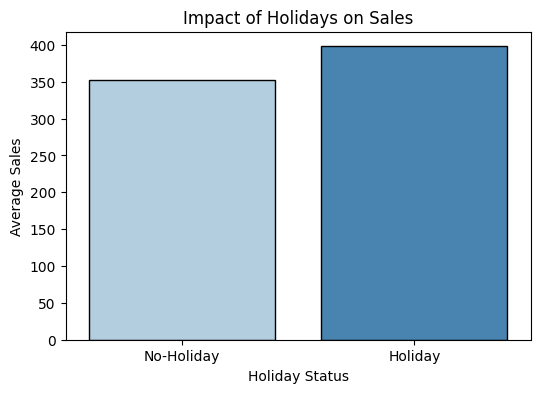

In [48]:
# Plot holiday vs. non-holiday sales

holiday_sales = train.groupby('is_holiday')['sales'].mean()


plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette="Blues", edgecolor="black")
plt.xticks([0, 1], ["No-Holiday", "Holiday"])
plt.xlabel("Holiday Status")
plt.ylabel("Average Sales")
plt.title("Impact of Holidays on Sales")
plt.show()

The above plot shows the average sales on holidays and non-holidays. There is a slight difference between average sales on holidays and non-holidays, but the difference is relatively small.
This suggests that holidays might not have a significant overall impact on sales.

<ipython-input-49-2ec745951244>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payday_sales.index, y=payday_sales.values, palette="Greens", edgecolor="black")


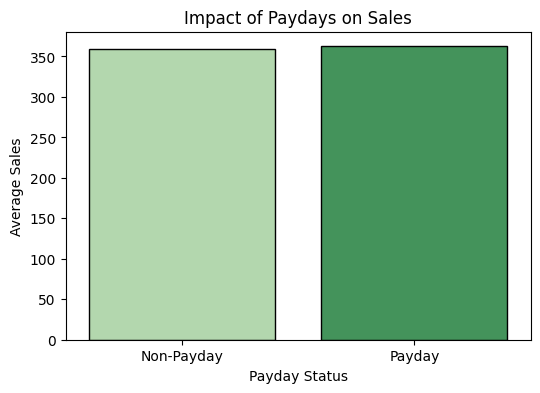

In [49]:

payday_sales = train.groupby('is_payday')['sales'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=payday_sales.index, y=payday_sales.values, palette="Greens", edgecolor="black")
plt.xticks([0, 1], ["Non-Payday", "Payday"])
plt.xlabel("Payday Status")
plt.ylabel("Average Sales")
plt.title("Impact of Paydays on Sales")
plt.show()

The above plot shows the average sales on paydays and non-paydays. There is a slight increase in sales on paydays compared to non-paydays, but it is not significant. This indicates that paydays might don't have any effect on sales.

<ipython-input-50-e0a893159651>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


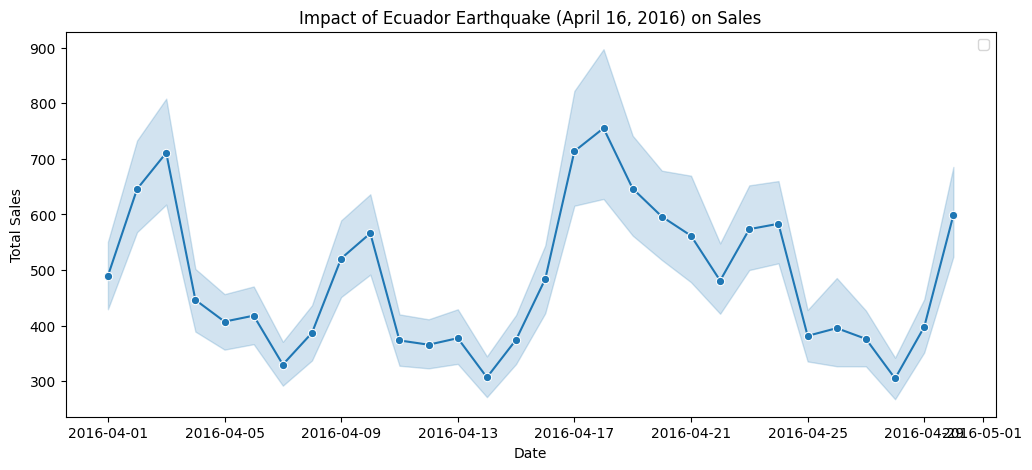

In [50]:
# plotting sales before and after earthquake

earthquake_period = train[(train['date'] >= '2016-04-01') & (train['date'] <= '2016-04-30')]

plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='sales', data=earthquake_period, marker="o")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Impact of Ecuador Earthquake (April 16, 2016) on Sales")
plt.legend()
plt.show()

The above plot showing the sales trend around the time of earthquake. There is no dramatic increase or decrease in the sales around the earthquake date, indicating no significant impact on overall sales due to the event.



In [51]:
train.groupby("is_promotion")["sales"].describe()

,count,mean,std,min,25%,50%,75%,max
is_promotion,,,,,,,,
0,2412443.0,157.944963,614.622987,0.0,0.000,3.000,53.6945,89576.36
1,622303.0,1140.579419,1939.335043,0.0,121.529,373.661,1270.0000,124717.00


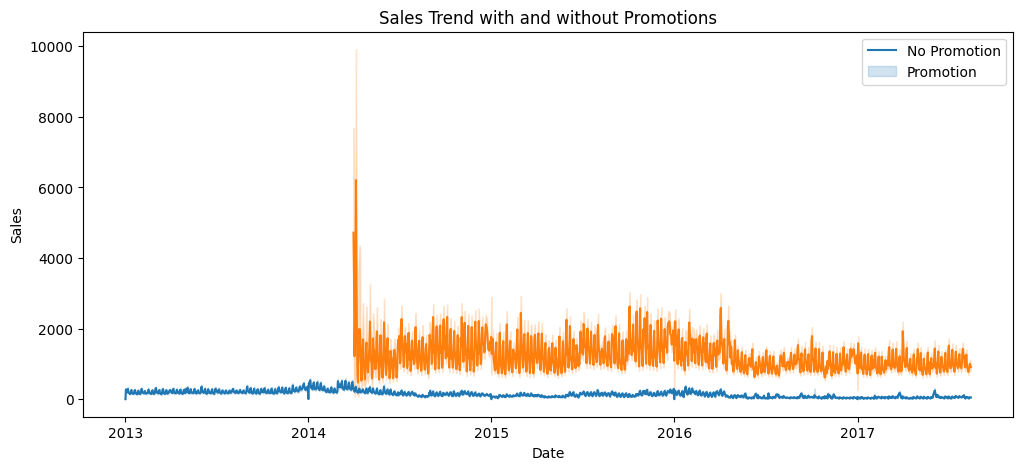

In [52]:
plt.figure(figsize=(12,5))
sns.lineplot(x=train["date"], y=train["sales"], hue=train["is_promotion"])
plt.title("Sales Trend with and without Promotions")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["No Promotion", "Promotion"])

The Line plot showing the sales trend over time, for days with and without promotions.It shows a clear pattern of sales increase during promotional periods compared to non-promotional periods. This indicates a strong positive impact of promotions on sales.

### Rolling Statistics and Lagged Features
Moving averages and rolling standard deviations of sales are calculated to capture recent trends. and Sales from the previous week and month are included to incorporate past performance.

In [53]:
#  Computing moving averages and rolling standard deviations for last week and last month sales

train["ma_7"] = train["sales"].rolling(window=7, min_periods=1).mean()       # min_periods=1 → Start calculations early, even with fewer days.
train["ma_30"] = train["sales"].rolling(window=30, min_periods=1).mean()     # min_periods=window size → Ensure full window data before computing.

train["std_7"] = train["sales"].rolling(window=7, min_periods=1).std()
train["std_30"] = train["sales"].rolling(window=30, min_periods=1).std()

In [54]:
#  Including lagged features (e.g., sales from the previous week, previous month).

train["sales_lag_7"] = train["sales"].shift(7) # Lagged sales from the previous week (7 days ago)


train["sales_lag_30"] = train["sales"].shift(30)  # Lagged sales from the previous month (30 days ago)

train.fillna(0, inplace=True)  # Since shifting creates NaN values for the first few rows, replacing them with 0

### Store-Specific Aggregations
Average sales per store type and top-selling product families per cluster are computed to incorporate store-level characteristics.

In [55]:
train['type_x'].value_counts()

,count
type_x,
D,1011582
C,842985
A,505791
B,449592
E,224796


In [56]:
# Computing Average Sales per Store Type using groupby

# Computing average sales per store type
avg_sales_per_store_type = train.groupby("type_x")["sales"].mean().reset_index()
# Renaming the column sales
avg_sales_per_store_type.rename(columns={"sales": "avg_sales_store_type"}, inplace=True)

# Merge this with the main dataset
train = train.merge(avg_sales_per_store_type, on="type_x", how="left")



In [57]:
avg_sales_per_store_type.columns

Index(['type_x', 'avg_sales_store_type'], dtype='object')

In [58]:
train['avg_sales_store_type'].value_counts()

,count
avg_sales_store_type,
352.459576,1011582
197.998011,842985
709.301004,505791
328.688979,449592
270.619140,224796


In [59]:
# Identifying Top-Selling Product Families per Cluster

# Computing total sales per product family within each store cluster
top_families_per_cluster = train.groupby(["cluster", "family"])["sales"].sum().reset_index()

# Finding the index of the row with the highest total sales for each cluster.
top_families_per_cluster = top_families_per_cluster.loc[top_families_per_cluster.groupby("cluster")["sales"].idxmax()]

# Rename column
top_families_per_cluster = top_families_per_cluster[["cluster", "family"]].rename(columns={"family": "top_selling_family"})

# Merge with main dataset
train = train.merge(top_families_per_cluster, on="cluster", how="left")





In [60]:
top_families_per_cluster.columns

Index(['cluster', 'top_selling_family'], dtype='object')

In [61]:
top_families_per_cluster['cluster'].nunique()

17

In [62]:
top_families_per_cluster['top_selling_family'].nunique()

1

In [63]:
train['top_selling_family'].value_counts()

,count
top_selling_family,
GROCERY I,3034746


### 3. Exploratory Data Analysis (EDA)

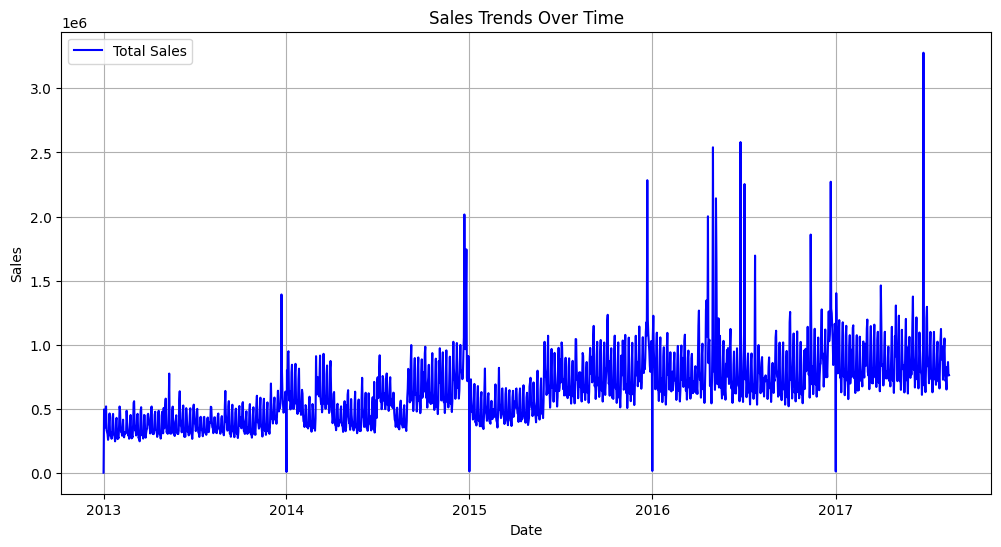

In [64]:
# Visualize Sales Trends Over Time

# Aggregate sales per day
daily_sales = train.groupby("date")["sales"].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label="Total Sales", color="blue")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()



The plot shows total daily sales over time. from the plot we can see there's an overall upward trend in sales, indicating business growth, and the sales are increasing from Jan to Dec every year, suggesting a strong seasonality effect.

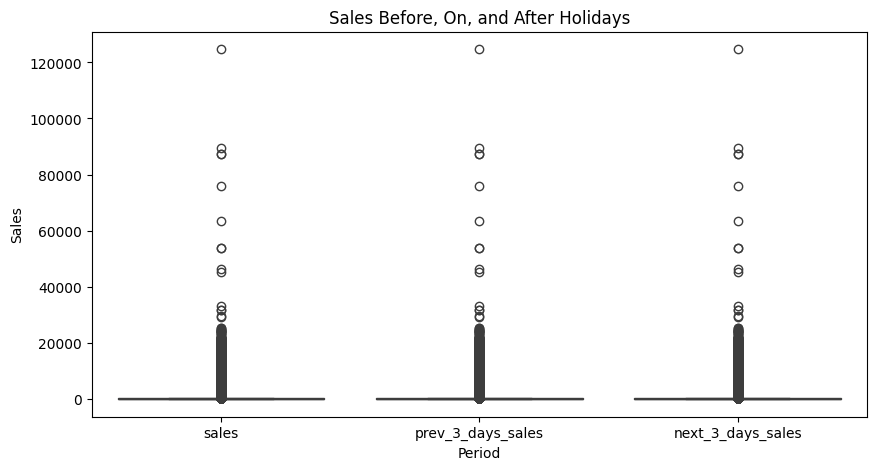

In [65]:
# Analyze Sales Before & After Holidays and Promotions

# average sales 3 days before & after a holiday
train["prev_3_days_sales"] = train.groupby("store_nbr")["sales"].shift(3)
train["next_3_days_sales"] = train.groupby("store_nbr")["sales"].shift(-3)

# Filter holiday data
holiday_sales = train[train["is_holiday"] == 1][["date", "sales", "prev_3_days_sales", "next_3_days_sales"]]

# Plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=holiday_sales[["sales", "prev_3_days_sales", "next_3_days_sales"]])
plt.title("Sales Before, On, and After Holidays")
plt.xlabel("Period")
plt.ylabel("Sales")
plt.show()


In the above plot comparing sales before, during, and after holidays. there is no significant change in sales on, before and after holidays. which shows there is no significant impact of holidays on the sales.

            dcoilwtico     sales
dcoilwtico    1.000000 -0.075348
sales        -0.075348  1.000000


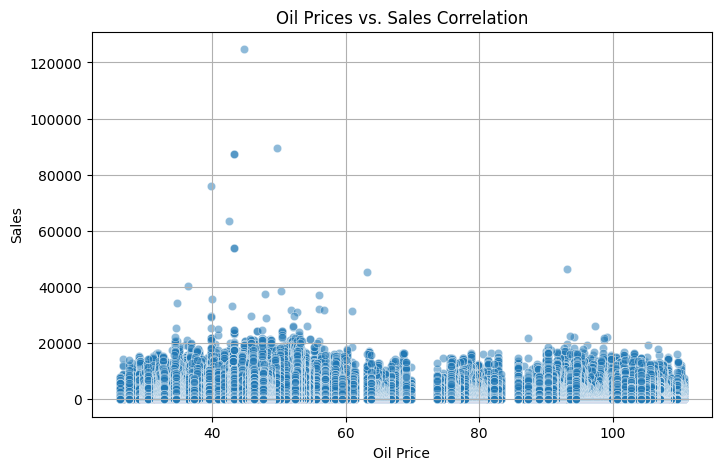

In [66]:
# Check Correlations Between Oil Prices & Sales

corr = train[["dcoilwtico", "sales"]].corr()
print(corr)

# Scatter plot of Oil Prices vs. Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train, x="dcoilwtico", y="sales", alpha=0.5)
plt.xlabel("Oil Price")
plt.ylabel("Sales")
plt.title("Oil Prices vs. Sales Correlation")
plt.grid()
plt.show()


The above plot showing the realtionship between oil prices and sales. The relationship is weak or we can say negligible between them.

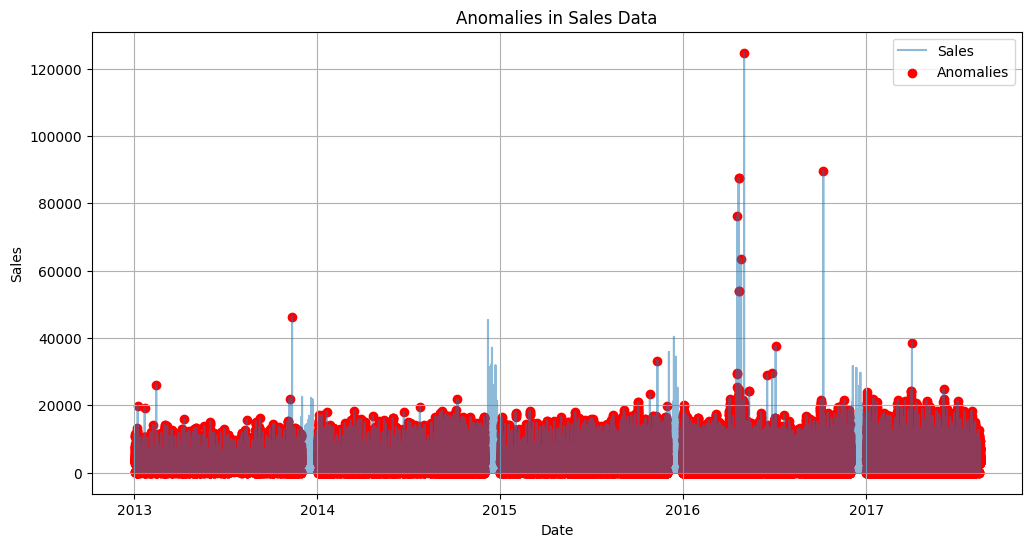

In [67]:
#  Identifying Anomalies in the Data using rolling averages and highlight unexpected spikes/drops.

# Compute 7-day moving average sales excluding december because sales are usually high in dec.
train["rolling_mean"] = train[train["date"].dt.month != 12].groupby("store_nbr")["sales"].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Identify anomalies where actual sales deviate significantly from the moving average
train["anomaly"] = abs(train["sales"] - train["rolling_mean"]) > (2 * train["sales"].std())

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(train["date"], train["sales"], label="Sales", alpha=0.5)
plt.scatter(train[train["anomaly"]]["date"], train[train["anomaly"]]["sales"], color="red", label="Anomalies")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Anomalies in Sales Data")
plt.legend()
plt.grid(True)
plt.show()


The above plot highlighting the sales anomalies using 7-day moving average. from the plot we can see certain days have significant deviations from the typical sales pattern, potentially caused by extreme events, data errors or outliers.

#### Removing the anomalies which are not in December month.

In [68]:
train_cleaned = train[~train["anomaly"]]

In [69]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2940519 entries, 0 to 3034745
Data columns (total 35 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id                    int64         
 1   date                  datetime64[ns]
 2   store_nbr             int64         
 3   family                object        
 4   sales                 float64       
 5   onpromotion           int64         
 6   city                  object        
 7   state                 object        
 8   type_x                object        
 9   cluster               int64         
 10  dcoilwtico            float64       
 11  type_y                object        
 12  is_holiday            int64         
 13  day                   int32         
 14  week                  UInt32        
 15  month                 int32         
 16  year                  int32         
 17  day_of_week           int32         
 18  is_weekend            int64         
 19  is_pr

<ipython-input-70-2d03e9efc2ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned["rolling_mean"] = train_cleaned[train_cleaned["date"].dt.month != 12].groupby("store_nbr")["sales"].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
<ipython-input-70-2d03e9efc2ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned["anomaly"] = abs(train_cleaned["sales"] - train_cleaned["rolling_mean"]) > (2 * train_cleaned["sales"].std())


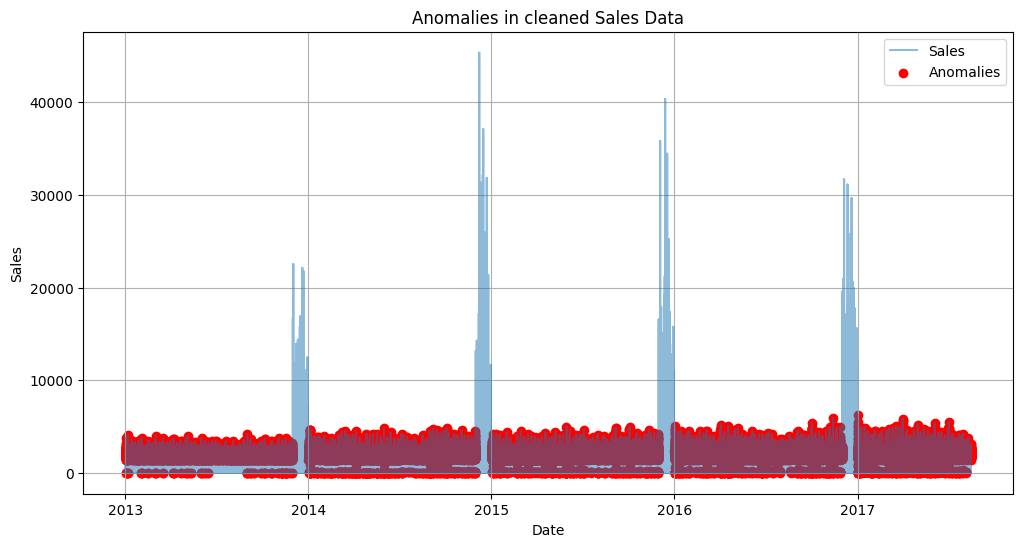

In [70]:

#  Identifying Anomalies in the Data using rolling averages and highlight unexpected spikes/drops.

# Compute 7-day moving average sales excluding december because sales are usually high in dec.
train_cleaned["rolling_mean"] = train_cleaned[train_cleaned["date"].dt.month != 12].groupby("store_nbr")["sales"].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Identify anomalies where actual sales deviate significantly from the moving average
train_cleaned["anomaly"] = abs(train_cleaned["sales"] - train_cleaned["rolling_mean"]) > (2 * train_cleaned["sales"].std())

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(train_cleaned["date"], train_cleaned["sales"], label="Sales", alpha=0.5)
plt.scatter(train_cleaned[train_cleaned["anomaly"]]["date"], train_cleaned[train_cleaned["anomaly"]]["sales"], color="red", label="Anomalies")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Anomalies in cleaned Sales Data")
plt.legend()
plt.grid(True)
plt.show()


## Part 2: Model Selection, Forecasting, and Evaluation

In [73]:
train_cleaned['prev_3_days_sales'] = train_cleaned['prev_3_days_sales'].fillna(0)
train_cleaned['next_3_days_sales'] = train_cleaned['next_3_days_sales'].fillna(0)
train_cleaned['rolling_mean'] = train_cleaned['rolling_mean'].fillna(0)

<ipython-input-73-7635bb1fd3d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['prev_3_days_sales'] = train_cleaned['prev_3_days_sales'].fillna(0)
<ipython-input-73-7635bb1fd3d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['next_3_days_sales'] = train_cleaned['next_3_days_sales'].fillna(0)
<ipython-input-73-7635bb1fd3d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

### Feature Selection and Refinement:

In [74]:
categorical_features = train_cleaned.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print(categorical_features)

['family', 'city', 'state', 'type_x', 'type_y', 'top_selling_family', 'anomaly']


In [75]:
# Convert categorical features to numerical using one-hot encoding
train_cleaned_encoded = pd.get_dummies(train_cleaned, columns=categorical_features, drop_first=True)

In [76]:
train_cleaned_encoded.columns

Index(['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'cluster',
       'dcoilwtico', 'is_holiday', 'day', 'week',
       ...
       'type_x_C', 'type_x_D', 'type_x_E', 'type_y_Bridge', 'type_y_Event',
       'type_y_Holiday', 'type_y_No Holiday', 'type_y_Transfer',
       'type_y_Work Day', 'anomaly_True'],
      dtype='object', length=107)

In [77]:
features = train_cleaned_encoded.columns.drop(['date', 'sales', 'rolling_mean'])
X = train_cleaned_encoded[features]
y = train_cleaned_encoded["sales"]

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Finding  highly correlated features(with corr>0.8)
high_corr_features = np.where(corr_matrix > 0.8)
high_corr_features = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

# Print highly correlated features
print(high_corr_features)



[('id', 'dcoilwtico'), ('id', 'year'), ('dcoilwtico', 'year'), ('is_holiday', 'type_y_No Holiday'), ('week', 'month'), ('is_economic_event', 'type_y_Event'), ('ma_7', 'std_7'), ('ma_30', 'std_30'), ('city_Esmeraldas', 'state_Esmeraldas'), ('city_Guaranda', 'state_Bolivar'), ('city_Guayaquil', 'state_Guayas'), ('city_Ibarra', 'state_Imbabura'), ('city_Latacunga', 'state_Cotopaxi'), ('city_Loja', 'state_Loja'), ('city_Machala', 'state_El Oro'), ('city_Manta', 'state_Manabi'), ('city_Puyo', 'state_Pastaza'), ('city_Quito', 'state_Pichincha'), ('city_Riobamba', 'state_Chimborazo'), ('city_Salinas', 'state_Santa Elena'), ('city_Santo Domingo', 'state_Santo Domingo de los Tsachilas')]


In [80]:
# Dropping the highly correlated variables which may reduces the model performance
features_to_drop = ['id', 'type_y_No Holiday', 'week', 'type_y_Event', 'std_7', 'std_30',
                    'state_Esmeraldas', 'state_Bolivar', 'state_Guayas', 'state_Imbabura', 'state_Cotopaxi',
                    'state_Loja', 'state_El Oro', 'state_Manabi', 'state_Pastaza', 'state_Pichincha',
                    'state_Chimborazo', 'state_Santa Elena', 'state_Santo Domingo de los Tsachilas']

train_cleaned_encoded = train_cleaned_encoded.drop(columns=features_to_drop)
features = [f for f in features if f not in features_to_drop]  # Update features list

In [82]:
# Splitting the dataset to train and validation
from sklearn.model_selection import train_test_split

X = train_cleaned_encoded[features]
y = train_cleaned_encoded["sales"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Building and evaluating its performance

###  Naive Forecasting (Baseline)

In [83]:
# A simple model assuming tomorrow’s sales = today’s sales.

from sklearn.metrics import mean_absolute_error

# Naïve forecast: Assume sales remain the same as the previous day
y_pred_naive = y_valid.shift(1, fill_value=y_train.mean())

# Evaluate performance
naive_mae = mean_absolute_error(y_valid, y_pred_naive)
print(f"Naïve Forecasting MAE: {naive_mae}")

Naïve Forecasting MAE: 366.57820243558734


### Random Forest Regressor

In [84]:

from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=5, random_state=42)  # You can tune hyperparameters
rf_model.fit(X_train, y_train)

# Predicting
y_pred_rf = rf_model.predict(X_valid)

# Evaluate Random Forest
rf_mae = mean_absolute_error(y_valid, y_pred_rf)
print(f"Random Forest MAE: {rf_mae}")

Random Forest MAE: 20.47734479093847


### XGBOOST (Gradient Boosting)

In [86]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.1 MB/s eta 0:00:00


In [91]:
import xgboost as xgb

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting
y_pred_xgb = xgb_model.predict(X_valid)

# Evaluate XGBoost
xgb_mae = mean_absolute_error(y_valid, y_pred_xgb)
print(f"XGBoost MAE: {xgb_mae}")


XGBoost MAE: 38.79453930592027


### ARIMA

In [109]:
import statsmodels.api as sm

In [110]:
from statsmodels.tsa.arima.model import ARIMA


arima_model = ARIMA(y_train, order=(2,1,0))  # Order (p,d,q)
arima_result = arima_model.fit()

# Predicting
y_pred_arima = arima_result.forecast(len(y_valid))

# Evaluate ARIMA performance
arima_mae = mean_absolute_error(y_valid, y_pred_arima)
print(f"ARIMA MAE: {arima_mae}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

ARIMA MAE: 238.24494521729557


### Model Comparison

In [111]:
#Compare performance using Mean Absolute Error (MAE).

models = {
    "Naïve Forecasting": naive_mae,
    "ARIMA": arima_mae,
    "Random Forest": rf_mae,
    "XGBoost": xgb_mae
}

# Print sorted results
sorted_models = sorted(models.items(), key=lambda x: x[1])
for model, mae in sorted_models:
    print(f"{model}: MAE = {mae}")


Random Forest: MAE = 20.47734479093847
XGBoost: MAE = 38.79453930592027
ARIMA: MAE = 238.24494521729557
Naïve Forecasting: MAE = 366.57820243558734


The best performing model is Randomforest due to its lowest MAE, so we will use it for forecasting future sales.

### Forecast Future Sales

In [96]:
# Applying the same preprocessing steps to the test dataset that were applied to the train dataset.
test_cleaned = test.copy()

# Convert categorical features to numerical using one-hot encoding
categorical_features = [col for col in categorical_features if col in test_cleaned.columns] # Filter categorical_features
test_cleaned_encoded = pd.get_dummies(test_cleaned, columns=categorical_features, drop_first=True)


# ensure test_cleaned_encoded has the same columns as X_train
missing_cols = set(X_train.columns) - set(test_cleaned_encoded.columns)
for col in missing_cols:
    test_cleaned_encoded[col] = 0

# Ensure order of columns is the same
test_cleaned_encoded = test_cleaned_encoded[X_train.columns]


X_test = test_cleaned_encoded[features]  # Your refined features
test["predicted_sales"] = rf_model.predict(X_test)

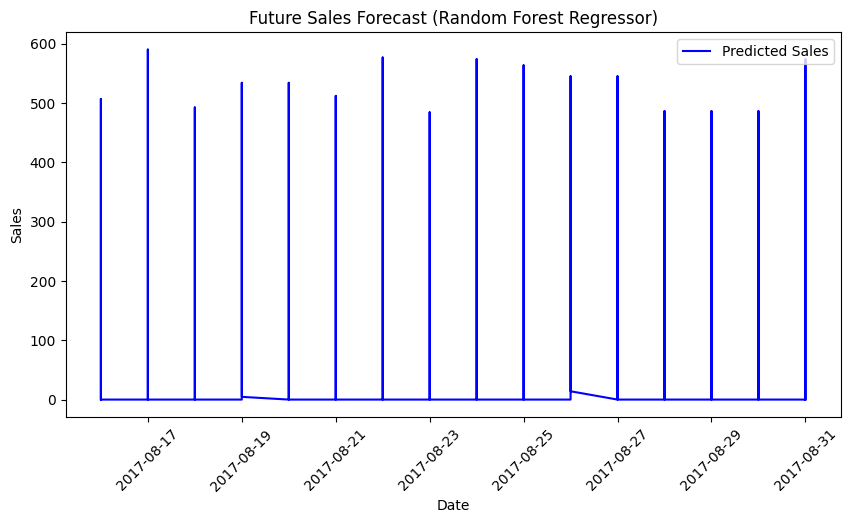

In [101]:
# Plot actual vs predicted sales trends
plt.figure(figsize=(10, 5))
plt.plot(test["date"], test["predicted_sales"], label="Predicted Sales", color='blue')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Future Sales Forecast (Random Forest Regressor)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [103]:
# Create submission DataFrame with required columns
submission = test[['id']].copy()  # Keep only the 'id' column
submission['sales'] = test["predicted_sales"]  # Replace with your predicted sales column

# Save the file in the correct format
submission.to_csv("submission.csv", index=False)

print("Submission file saved as submission.csv successfully!")

Submission file saved as submission.csv successfully!
